# 1 -¿Que veremos?

1.    Como una computadora percibe una imágen digital
2.    Utilizar imágenes digitales en python



# 2 - ¿Qué necesitaremos?

## Librerías útiles

**Numpy**: una librería que facilita operaciones con arreglos multidimensionales (vectores y matrices)

**OpenCv**: una libería que facilita el trabajo con Reconocimiento de Imágenes

**Pillow**: Librería que facilita la manipulación de imágenes

**MathPlotLib**: herramienta para poder graficar expresiones y ecuaciones matemáticas

Como representar Imágenes digitales con su estructura Multidimensional
*  Concepto de imágenes digitales
*  Escala de grises: arreglo 2D
*  Imágenes RGB: Arreglo 3D

# 3 - Imágenes Digitales


Una [imagen digital](https://es.wikipedia.org/wiki/Imagen_digital) o un gráfico digital es una representación bidimensional de una imagen a partir de una matriz numérica, frecuentemente en binario (unos y ceros). Dependiendo de si la resolución de la imagen es estática o dinámica, puede tratarse de una imagen matricial (o mapa de bits) o de un gráfico vectorial. El mapa de bits es el formato más utilizado en informática.

## Ejemplos

Un pingüino con daltonísmo por lo que será escala de grises

Pingu01.png

Un cuadro digno del gran Picasso

Picazzo.png

### ¿No se ven dicen?

#### El pinguino

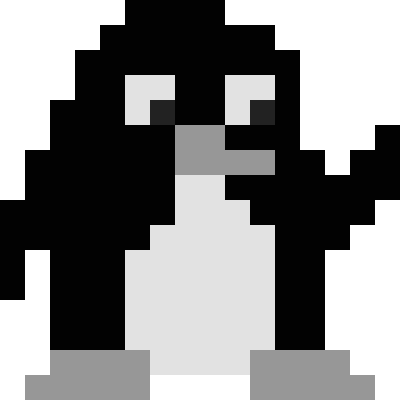

#### El cuadro

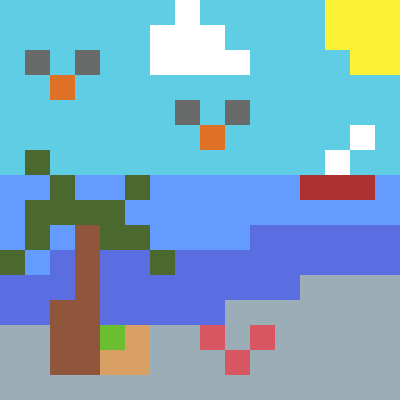

# 4 - Ejercicios con programas

## Para usar imágenes con Python

Primero se deben importar las librerías con las que se trabajará, y hay dos librerías que seran suficiente.

In [ ]:
# Facilitar el trabajo con vectore y matrices
import numpy as np
# Facilitar graficar puntos en un plano
import matplotlib.pyplot as mp
# Facilitar la manipulación de imágenes
import cv2 as oc
# Hacer que se muestren los planos con los puntos en colab
%matplotlib inline

La última línea dice ***%matplotlib inline***, eso se usa en Google Colab para mostrar las gráficas creadas con la librería


## Entendiendo MatPlotLib en un repasón

Hay que probar un poco la librería para entender su funcionamiento, supongamos una serie de valores en un lista (o vector) parecido a este:

    [ 1 , 2 , 3 , 4 , 5 ]

Recordando el detalle que en un vector ( como el mostrado ) su valores se encuentran en una posición identificable:

    Posición:  0   1   2   3   4
               |   |   |   |   |
               v   v   v   v   v
    Valores :[ 1 , 2 , 3 , 4 , 5 ]

In [ ]:
lista = [ 1 , 2 , 3 , 4 , 5 ]
mp.plot( lista )
# mp.show()

El comentario en la última linea es para recordar que si se va a usar algo diferente a Google Colab, o  Jupyter Noteebook, se usaría ***mp.show()*** para mostrar la gráfica

Pero siguiendo con la idea, la gráfica previa se tuvo que mostrar como una línea recta... dónde cada punto en el plano cartesiano requiere un valor para X y uno para Y... ¿Entonces de dónde salieron los valores de cada punto?

Existe una forma para poder graficar puntos si le entregamos dos listas de igual dimensión, dónde cada una posee los valores de cada punto (x,y) a ser utilizados

Supongamos una lista de puntos donde pásará una gráfica:

    (0,2), (1,5), (2,4), (3,1) y (4,3)

Para eso necesitamos dos listas, una con los valores de X, otra con los valores de Y

In [ ]:
listax = [ 0 , 1 , 2 , 3 , 4 ]
listay = [ 2 , 5 , 4 , 1 , 3 ]

mp.plot( listax, listay )
# mp.show()

Pero la librería matplotlib es útil para mostrar los valores con un formato diferente, supongamos la siguiente matriz :

    | 0 0 1 1 |
    | 1 1 0 0 |
    | 1 1 0 0 |
    | 0 0 1 1 |

En python se necesitarían varias listas dentro de una lista contenedora :

    [
      [ 0 , 0 , 1 , 1 ] ,
      [ 1 , 1 , 0 , 0 ] ,
      [ 1 , 1 , 0 , 0 ] ,
      [ 0 , 0 , 1 , 1 ] ,
    ]

In [ ]:
matriz = [
  [ 0 , 0 , 1 , 1 ] ,
  [ 1 , 1 , 0 , 0 ] ,
  [ 1 , 1 , 0 , 0 ] ,
  [ 0 , 0 , 1 , 1 ] ,
]

mp.figure( figsize=( 2, 3 ))
mp.imshow( matriz , cmap='gray')
# mp.show()

Se puede jugar con la  matriz para "dibujar" algo diferente:

    | 0 1 1 0 |
    | 1 0 0 1 |
    | 1 0 0 1 |
    | 0 1 1 0 |

In [ ]:
matriz = [
  [ 0 , 1 , 1 , 0 ] ,
  [ 1 , 0 , 0 , 1 ] ,
  [ 1 , 0 , 0 , 1 ] ,
  [ 0 , 1 , 1 , 0 ] ,
]

matriz[2][1] = 1

mp.figure( figsize=( 2, 3 ))
mp.imshow( matriz , cmap='gray')
# mp.show()

## Probando matrices de dos dimensiones

Las imágenes con colores son representadas como en los ejercicios anteriores pero en tres matrices, donde cada matriz representa el nivel de Rojo, Verde y Azul que puede utilizarse en cada led de los monitores de las computadoras

Antes, hace mucho tiempo... bueno no tanto... las pantallas no eran a colores, y lo mas que se hacía era atenuar la luz que se presentaba, o sea, que variaba desde medio apagado hasta bien encendido, con una serie de pulsos (valores) desde 0 (apagado) hasta 255 (bien encendido)

Tomemos como ejemplo el bonoito pingüino 🐧

... pero no este, este está muy bien echo, usemos el del dibujo de arriba

Pingu01.png

In [ ]:
pinguino = [
  [255,255,255,255,255,  2,  2,  2,  2,255,255,255,255,255,255,255],
  [255,255,255,255,  2,  2,  2,  2,  2,  2,  2,255,255,255,255,255],
  [255,255,255,  2,  2,  2,  2,  2,  2,  2,  2,  2,255,255,255,255],
  [255,255,255,  2,  2,226,226,  2,  2,226,226,  2,255,255,255,255],
  [255,255,  2,  2,  2,226, 34,  2,  2,226, 34,  2,255,255,255,255],
  [255,255,  2,  2,  2,  2,  2,151,151,  2,  2,  2,255,255,255,  2],
  [255,  2,  2,  2,  2,  2,  2,151,151,151,151,  2,  2,255,  2,  2],
  [255,  2,  2,  2,  2,  2,  2,226,226,  2,  2,  2,  2,  2,  2,  2],
  [  2,  2,  2,  2,  2,  2,  2,226,226,226,  2,  2,  2,  2,  2,255],
  [  2,  2,  2,  2,  2,  2,226,226,226,226,226,  2,  2,  2,255,255],
  [  2,255,  2,  2,  2,226,226,226,226,226,226,  2,  2,255,255,255],
  [  2,255,  2,  2,  2,226,226,226,226,226,226,  2,  2,255,255,255],
  [255,255,  2,  2,  2,226,226,226,226,226,226,  2,  2,255,255,255],
  [255,255,  2,  2,  2,226,226,226,226,226,226,  2,  2,255,255,255],
  [255,255,151,151,151,151,226,226,226,226,151,151,151,151,255,255],
  [255,151,151,151,151,151,255,255,255,255,151,151,151,151,151,255]
]
mp.imshow(pinguino,cmap='gray')
# mp.show()

Podemos modificar la imagen de una forma bien sencilla... 🤡 ok, no tan sencilla, pero fácil, solo cambiaremos las pupilas de los ojos para que mire hacia arriba.

¿Dónde estan los ojos?
en la posición de la séptima columna y quinta fila..., o sea, en la **(6,4)** y tiene un valor asociado de **34** y justo antes (en la parte superior de la matriz) tiene un color más claro, en la **(6,3)** tiene el valor **226**, por lo que podemos intercambiarlos:

*   la celda (6,4) debe tener el valor 226
*   y la celda (6,3) debe tener el valor 34

In [ ]:
pinguino[4][6] = 226
pinguino[3][6] = 34

mp.imshow(pinguino,cmap='gray')
# mp.show()

¡Hijole!... el pingüino quedó con los ojos virolos...

¿Cómo lo puedo arreglar?

### Arreglo de los ojos

Pues se podría hacer que el otro ojo parezca que está viendo en una dirección similar:

*   la celda (10,4) debe tener el valor de 226
*   y la celda (10,3) debe tener el valor de 34

In [ ]:
pinguino[4][10] = 226
pinguino[3][10] = 34

mp.imshow(pinguino,cmap='gray')
# mp.show()

## Probando matrices de tres dimensiones

Una matriz de dos dimensiones tiene altura y ancho, como en los ejemplos previos, una matriz de dos dimensiones de tres filas de altura y dos de ancho se vería así:

              ┌───┬───┬───┐      ┌────┬────┬────┐
    capa 1 -> │   │   │   │      │  1 │  2 │  3 │
              ├───┼───┼───┤      ├────┼────┼────┤
              │   │   │   │      │  4 │  5 │  6 │
              └───┴───┴───┘      └────┴────┴────┘
                                      Capa 1

En python sería como:
    
    [
      [  1 ,  2 ,  3 ],
      [  4 ,  5 ,  6 ]
    ]

Pero si a esa matriz le agregamos un nivel de una profundidad, se necesita que cada elmenento posea unespacio propio en la misma posición para otros valores :

    capa 2 --> ┌───┬───┬───┐     ┌────┬────┬────┐  ┌────┬────┬────┐
    capa 1 -> ┌┴──┬┴──┬┴──┐│     │  1 │  2 │  3 │  │  7 │  8 │  9 │
              │   │   │   ├┤     ├────┼────┼────┤  ├────┼────┼────┤
              ├───┼───┼───┤│     │  4 │  5 │  6 │  │ 10 │ 11 │ 12 │
              │   │   │   ├┘     └────┴────┴────┘  └────┴────┴────┘
              └───┴───┴───┘           Capa 1            Capa 2

En python esto es como ver una lista con listas

    [
      [
        [  1 ,  7 ] , [  2 ,  8 ] , [  3 ,  9 ]
      ] ,
      [
        [  4 , 10 ] , [  5 , 11 ] , [  6 , 12 ]
      ]
    ]
    
Y si le agregamos una tercerca capa... nos complicaremos pero no es difícil :

    capa 3 ---> ┌───┬───┬───┐
    capa 2 --> ┌┴──┬┴──┬┴──┐│    ┌────┬────┬────┐  ┌────┬────┬────┐  ┌────┬────┬────┐
    capa 1 -> ┌┴──┬┴──┬┴──┐├┤    │  1 │  2 │  3 │  │  7 │  8 │  9 │  │ 13 │ 14 │ 15 │
              │   │   │   ├┤│    ├────┼────┼────┤  ├────┼────┼────┤  ├────┼────┼────┤
              ├───┼───┼───┤├┘    │  4 │  5 │  6 │  │ 10 │ 11 │ 12 │  │ 16 │ 17 │ 18 │
              │   │   │   ├┘     └────┴────┴────┘  └────┴────┴────┘  └────┴────┴────┘
              └───┴───┴───┘           Capa 1            Capa 2           Capa 3

Para python es como :

    [
      [
        [  1 ,  7 , 13 ] , [  2 ,  8 , 14 ] , [  3 ,  9 , 15 ]
      ] ,
      [
        [  4 , 10 , 16 ] , [  5 , 11 , 17 ] , [  6 , 12 , 18 ]
      ]
    ]

Las imágenes a colores pueden tener mas capas, pero básicamente son tres valores para representar en cada punto, siendo una mezcla de tres colores: rojo, verde y azul, en inglés es: Red, Green y Blue por esa razón reciben el nombre de RGB.

Así que probemos, cada terna debe llevar en orden tres valores entre 0 y 255

In [ ]:
prueba = [
    [
        [ 255,   0,   0] , [   0, 255,   0] , [   0,   0, 255]
    ] ,
    [
        [   0, 255, 255] , [ 255, 255,   0] , [ 255,   0, 255]
    ] ,
    [
        [   0,   0,   0] , [ 128, 128, 128] , [ 255, 255, 255]
    ]
]
mp.imshow(prueba)
# mp.show()

Dibujemos un barco sencillo

In [ ]:
barco = [
  [
    [ 95,205,228],[ 95,205,228],[ 95,205,228],[255,255,255],[ 95,205,228],
  ],
  [
    [ 95,205,228],[ 95,205,228],[255,255,255],[ 95,205,228],[ 95,205,228],
  ],
  [
    [ 99,155,255],[172, 50, 50],[172, 50, 50],[172, 50, 50],[ 99,155,255],
  ],
  [
    [ 99,155,255],[ 99,155,255],[ 99,155,255],[ 99,155,255],[ 99,155,255],
  ]
]
mp.imshow(barco)
# mp.show()

Y ahora una obra maestra

In [ ]:
picasso = [
  [
    [ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[255,255,255],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[251,242, 54],[251,242, 54],[251,242, 54]
  ],
  [
    [ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[255,255,255],[255,255,255],[255,255,255],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[251,242, 54],[251,242, 54],[251,242, 54]
  ],
  [
    [ 95,205,228],[105,106,106],[ 95,205,228],[105,106,106],[ 95,205,228],[ 95,205,228],[255,255,255],[255,255,255],[255,255,255],[255,255,255],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[251,242, 54],[251,242, 54]
  ],
  [
    [ 95,205,228],[ 95,205,228],[223,113, 38],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228]
  ],
  [
    [ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[105,106,106],[ 95,205,228],[105,106,106],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228]
  ],
  [
    [ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[223,113, 38],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[255,255,255],[ 95,205,228]
  ],
  [
    [ 95,205,228],[ 75,105, 47],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[ 95,205,228],[255,255,255],[ 95,205,228],[ 95,205,228]
  ],
  [
    [ 99,155,255],[ 99,155,255],[ 75,105, 47],[ 99,155,255],[ 99,155,255],[ 75,105, 47],[ 99,155,255],[ 99,155,255],[ 99,155,255],[ 99,155,255],[ 99,155,255],[ 99,155,255],[172, 50, 50],[172, 50, 50],[172, 50, 50],[ 99,155,255]
  ],
  [
    [ 99,155,255],[ 75,105, 47],[ 75,105, 47],[ 75,105, 47],[ 75,105, 47],[ 99,155,255],[ 99,155,255],[ 99,155,255],[ 99,155,255],[ 99,155,255],[ 99,155,255],[ 99,155,255],[ 99,155,255],[ 99,155,255],[ 99,155,255],[ 99,155,255]
  ],
  [
    [ 99,155,255],[ 75,105, 47],[ 99,155,255],[143, 86, 59],[ 75,105, 47],[ 75,105, 47],[ 99,155,255],[ 99,155,255],[ 99,155,255],[ 99,155,255],[ 91,110,225],[ 91,110,225],[ 91,110,225],[ 91,110,225],[ 91,110,225],[ 91,110,225]
  ],
  [
    [ 75,105, 47],[ 99,155,255],[ 91,110,225],[143, 86, 59],[ 91,110,225],[ 91,110,225],[ 75,105, 47],[ 91,110,225],[ 91,110,225],[ 91,110,225],[ 91,110,225],[ 91,110,225],[ 91,110,225],[ 91,110,225],[ 91,110,225],[ 91,110,225]
  ],
  [
    [ 91,110,225],[ 91,110,225],[ 91,110,225],[143, 86, 59],[ 91,110,225],[ 91,110,225],[ 91,110,225],[ 91,110,225],[ 91,110,225],[ 91,110,225],[ 91,110,225],[ 91,110,225],[155,173,183],[155,173,183],[155,173,183],[155,173,183]
  ],
  [
    [ 91,110,225],[ 91,110,225],[143, 86, 59],[143, 86, 59],[ 91,110,225],[ 91,110,225],[ 91,110,225],[ 91,110,225],[ 91,110,225],[155,173,183],[155,173,183],[155,173,183],[155,173,183],[155,173,183],[155,173,183],[155,173,183]
  ],
  [
    [155,173,183],[155,173,183],[143, 86, 59],[143, 86, 59],[106,190, 48],[217,160,102],[155,173,183],[155,173,183],[217, 87, 99],[155,173,183],[217, 87, 99],[155,173,183],[155,173,183],[155,173,183],[155,173,183],[155,173,183]
  ],
  [
    [155,173,183],[155,173,183],[143, 86, 59],[143, 86, 59],[217,160,102],[217,160,102],[155,173,183],[155,173,183],[155,173,183],[217, 87, 99],[155,173,183],[155,173,183],[155,173,183],[155,173,183],[155,173,183],[155,173,183]
  ],
  [
    [155,173,183],[155,173,183],[155,173,183],[155,173,183],[155,173,183],[155,173,183],[155,173,183],[155,173,183],[155,173,183],[155,173,183],[155,173,183],[155,173,183],[155,173,183],[155,173,183],[155,173,183],[155,173,183]
  ]
]
mp.imshow(picasso)
# mp.show()

Se puede comprobar las dimensiones de la matriz

In [ ]:
print("Ancho : ", end="")
print(len(picasso))
print("Alto  : ", end="")
print(len(picasso[0]))
print("Fondo : ", end="")
print(len(picasso[0][0]))

# Referencias bibliográficas

Para curiosiar mas de la librería MatPlotLib [matplotlib.ipynb](https://colab.research.google.com/github/juansensio/blog/blob/master/022_matplotlib/matplotlib.ipynb#scrollTo=qzNbPyO8OBGd)